In [ ]:
# check again vif
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

removed2=[]
max_vif = thresh = 10
while max_vif >= thresh:
  max_vif = max([variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])])
  for i in range(x_copy.shape[1]):
    if variance_inflation_factor(x_copy, i) > thresh:
      removed2.append(x_copy.columns[i])
      print(x_copy.columns[i], variance_inflation_factor(x_copy, i))
      x_copy.drop(x_copy.columns[i], axis=1, inplace=True)
      break

# Calculate VIF
vif = pd.DataFrame()
vif["Variable"] = x_copy.columns
vif["VIF"] = [variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])]
print(vif)

informative_2 inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


duplicate_1 inf
informative_1 203.4003737990553
min max scaling 12.357449693901117
standard scaling 12.125428946845139
duplicate_2 58.94226627548491
                 Variable       VIF
0                 zipcode  4.037702
1   correlated w target 2  1.513976
2          uniform corr 1  5.608300
3   correlated w target 1  1.305409
4      corr_feature_class  1.878378
5          uniform corr 2  5.730316
6              outliers 1  1.005714
7     multicollinearity 2  1.859519
8     multicollinearity 4  1.814491
9     multicollinearity 3  1.808002
10                 target  2.346822
11             outliers 2  3.359447
12    multicollinearity 1  1.850159


In [ ]:
print(removed1)
print(removed2)

['informative_2', 'duplicate_1', 'target', 'standard scaling']
['informative_2', 'duplicate_1', 'informative_1', 'min max scaling', 'standard scaling', 'duplicate_2']


## Outliers

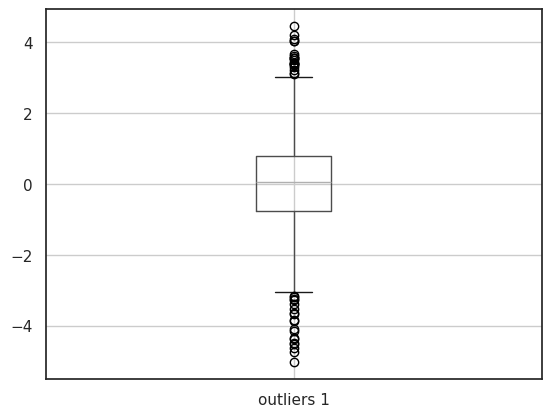

In [ ]:
# code along
df.boxplot(column=['outliers 1']);

In [ ]:
# code along
df.describe()

,zipcode,min max scaling,correlated w target 2,informative_2,standard scaling,uniform corr 1,correlated w target 1,duplicate_1,informative_1,corr_feature_class,uniform corr 2,outliers 1,duplicate_2,multicollinearity 2,multicollinearity 4,multicollinearity 3,target,outliers 2,multicollinearity 1,class
count,894.000000,1010.000000,706.000000,1010.000000,959.000000,708.000000,1010.000000,1010.000000,1010.000000,708.000000,809.000000,959.000000,1010.000000,1010.000000,708.000000,808.000000,1010.000000,705.000000,960.000000,1010.000000
mean,50521.133110,390.171298,0.167771,-0.018978,50202.105782,0.482213,0.322972,-0.047372,-0.047372,2.125427,0.498491,0.003931,-0.018978,-0.003345,0.032651,0.029246,0.195609,3.047240,0.024498,0.502970
std,27720.711405,101.935412,2.949313,1.403413,9782.246158,0.296829,2.787001,1.324010,1.324010,2.834879,0.291318,1.343284,1.403413,1.010316,1.027634,1.007042,2.991347,2.107580,0.997825,0.500239
min,863.000000,12.337301,-8.847831,-4.543441,14461.923406,0.002451,-7.667660,-3.836929,-3.836929,-8.464056,0.001908,-5.028328,-4.543441,-3.484967,-3.307864,-2.961237,-8.943212,-3.424396,-3.507133,0.000000
25%,26927.750000,323.177281,-1.849490,-1.050339,43573.063701,0.206552,-1.543348,-1.018399,-1.018399,0.581896,0.241595,-0.759595,-1.050339,-0.707004,-0.648515,-0.645164,-2.166961,1.568108,-0.649695,0.000000
50%,50642.500000,387.285575,0.064821,-0.194004,49862.763263,0.490248,0.292704,-0.224366,-0.224366,2.023283,0.496818,0.052071,-0.194004,0.010906,0.066550,0.016176,-0.011259,3.021694,0.024649,1.000000
75%,74245.250000,454.454554,2.190268,0.991017,57112.152485,0.736944,2.131766,0.975364,0.975364,3.709541,0.757341,0.779475,0.991017,0.673806,0.717802,0.730172,2.367192,4.556020,0.717308,1.000000
max,99807.000000,746.801554,9.597114,4.020262,84294.633427,0.999988,9.574222,3.994644,3.994644,16.364768,0.999919,4.459692,4.020262,2.986066,3.024011,3.366995,9.299296,9.259114,3.402616,1.000000


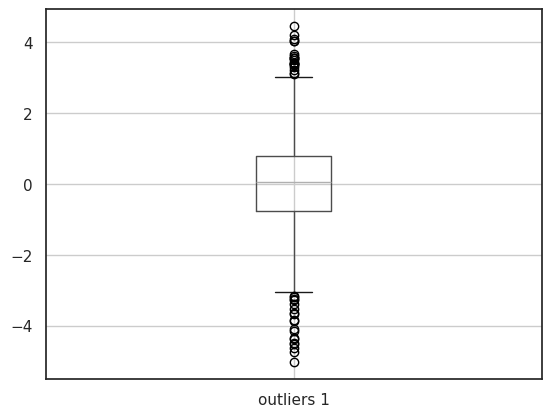

In [ ]:
# code along
df.boxplot(column=['outliers 1']);

# code along
df.describe()

# Assuming you want to store information about the 'outliers 1' column
# Calculate outliers based on IQR (Interquartile Range)
Q1 = df['outliers 1'].quantile(0.25)
Q3 = df['outliers 1'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['outliers 1'] < (Q1 - 1.5 * IQR)) | (df['outliers 1'] > (Q3 + 1.5 * IQR))]

# Create a variable to pickle
data = {'outliers': outliers}

# Pickle the variable and save it to a file
with open('outliers.pkl', 'wb') as f:
    pickle.dump(data, f)

In [ ]:
# code along
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   binary                 906 non-null    object 
 1   given_name             1010 non-null   object 
 2   surname                707 non-null    object 
 3   date_of_birth          960 non-null    object 
 4   phone_number           1010 non-null   object 
 5   email                  1010 non-null   object 
 6   address                439 non-null    object 
 7   city                   624 non-null    object 
 8   state                  845 non-null    object 
 9   zipcode                894 non-null    float64
 10  pd qcut3               806 non-null    object 
 11  constant_1             1010 non-null   object 
 12  min max scaling        1010 non-null   float64
 13  constant_2             1010 non-null   object 
 14  pd qcut1               809 non-null    object 
 15  corr